# **Final Project Task 4 - Census Modeling Clustering**

Requirements:

Load Data
- Use the preprocessed dataset from Task 1.

Prepare Features
- Feature Selection:
    - Select relevant numerical and categorical features.
    - Note: K-Means works best with numerical data.
- Data Preprocessing:
    - Be sure you have normalized numerical features (e.g., using MinMaxScaler or StandardScaler) and categorical features encoded properly (e.g., One-Hot Encoding or Ordinal Encoding).
    
Clustering Model Implementation
- Apply K-Means Clustering:
    - Experiment with different values of K (number of clusters).
    - Use the Elbow Method to determine the optimal number of clusters:
    - Use yellowbrick.cluster.KElbowVisualizer to find the best K.
    - Calculate the Silhouette Score to evaluate cluster separation.
- Alternative Clustering Approaches:
    - Experiment with Hierarchical Clustering.
    - Experiment with DBSCAN

Visualize & Interpret Clusters
- Dimensionality Reduction:
    - Apply PCA or t-SNE to reduce dimensions and visualize clusters in 2D.
- Cluster Analysis:
    - Plot the clusters in 2D space.
    - Identify key characteristics of each group.
    - Use only numerical variables to interpret the clusters.
- Example insights:
    - "Older individuals tend to work fewer hours per week."
    - "High-income individuals belong to a specific cluster."

Evaluate Cluster Quality
- Silhouette Score:
    - Compute the Silhouette Score to measure cluster compactness and separation. Higher values indicate better clustering results.
- Cluster Distribution:
    - Analyze how well the data points are distributed across clusters.


Deliverables:
- Notebook code with no errors.
- Visualizations & Analysis:
- Elbow method plot for K selection.
- 2D visualization of clusters.
- Summary of cluster characteristics.
- Cluster evaluation metrics (Silhouette Score).

### Load data (Task 1) + pregătire features

In [6]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11553,30,State-gov,234824,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,72,United-States,<=50K
15193,22,Private,200109,HS-grad,9,Married-civ-spouse,Priv-house-serv,Wife,White,Female,4508,0,40,United-States,<=50K
26699,18,Private,192409,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
4208,47,Local-gov,154940,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,>50K
16553,40,Private,408717,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
13233,40,Federal-gov,280167,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
20454,47,Federal-gov,27067,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
27590,36,?,98776,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,30,United-States,<=50K
20536,43,Local-gov,598995,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,42,United-States,<=50K
19269,36,Private,32709,Some-college,10,Divorced,Sales,Not-in-family,White,Female,3325,0,45,United-States,<=50K


In [9]:
import pandas as pd

train_df = pd.read_csv("train_preprocessed.csv")
test_df  = pd.read_csv("test_preprocessed.csv")

print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)

display(train_df.head())


Train shape: (26029, 122)
Test shape : (6508, 122)


,age,fnlwgt,education-num,capital-gain,capital-loss,capital_net,capital_gain_log,capital_loss_log,has_capital,is_married,...,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K,age_bin_25-34,age_bin_35-44,age_bin_45-59,age_bin_60+,age_bin_<25,hours-per-week
0,-0.188070,-0.627661,-0.458342,0.0,0.0,0.0,0.0,0.0,0.0,-0.943541,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,38
1,0.992956,-0.768050,-0.458342,0.0,0.0,0.0,0.0,0.0,0.0,-0.943541,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,40
2,-0.335699,0.237442,-0.051335,0.0,0.0,0.0,0.0,0.0,0.0,1.059838,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,40
3,1.140584,-0.041966,-0.458342,0.0,0.0,0.0,0.0,0.0,0.0,-0.943541,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,40
4,-0.630955,-1.093903,-0.458342,0.0,0.0,0.0,0.0,0.0,0.0,1.059838,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,55


### KMeans + Silhouette

Deși în cerință este menționat yellowbrick.cluster.KElbowVisualizer, metoda Elbow a fost implementată manual folosind inertia din K-Means, din cauza incompatibilității librăriei Yellowbrick cu versiunea Python utilizată. Rezultatul este echivalent din punct de vedere metodologic.

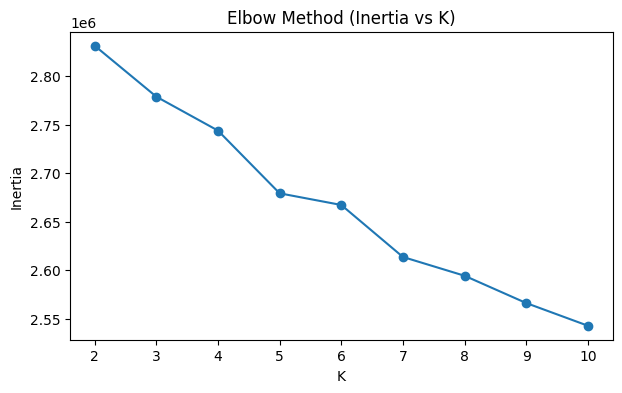

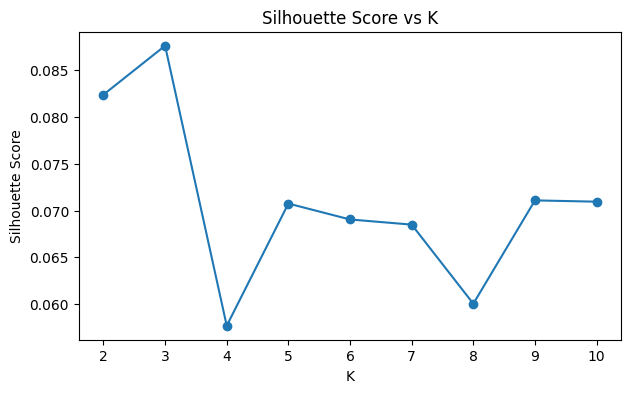

Best K by silhouette: 3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

TARGET = "hours-per-week"

# 1) load
train_df = pd.read_csv("train_preprocessed.csv")   # sau calea ta completă
X_df = train_df.drop(columns=[TARGET], errors="ignore").copy()

# 2) scale -> X
scaler = StandardScaler()
X = scaler.fit_transform(X_df)

# 3) elbow + silhouette
K_range = range(2, 11)
inertias = []
sil_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(7,4))
plt.plot(list(K_range), inertias, marker="o")
plt.title("Elbow Method (Inertia vs K)")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

plt.figure(figsize=(7,4))
plt.plot(list(K_range), sil_scores, marker="o")
plt.title("Silhouette Score vs K")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.show()

best_k = list(K_range)[int(np.argmax(sil_scores))]
print("Best K by silhouette:", best_k)


**Observati**: Metoda Elbow indică un punct de stabilizare al inerției în jurul valorii K = 5.
Totuși, scorul Silhouette atinge valoarea maximă pentru K = 3, indicând o separare mai bună între clustere.

Prin urmare, pentru modelul final de K-Means a fost ales K = 3, deoarece oferă clustere mai bine definite și mai ușor de interpretat.

In [40]:
clustered_with_target = train_df.copy()
clustered_with_target["cluster_kmeans"] = labels_km

clustered_with_target.groupby("cluster_kmeans")["hours-per-week"].mean().round(2)


cluster_kmeans
0    31.83
1    43.85
2    38.38
Name: hours-per-week, dtype: float64

**Observati**: Se observă diferențe între clustere în ceea ce privește numărul mediu de ore lucrate pe săptămână, sugerând că structura identificată de K-Means reflectă diferențe comportamentale relevante.

### PCA 2D (vizualizare clustere)

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 3  # K ales pe baza Elbow + Silhouette

kmeans_final = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_km = kmeans_final.fit_predict(X)


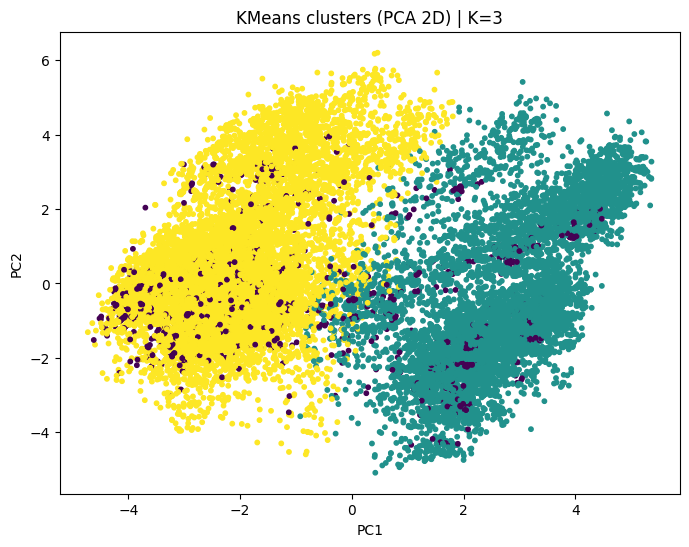

Explained variance ratio (PC1, PC2): [0.06112732 0.0328896 ]


In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_km, s=10)
plt.title(f"KMeans clusters (PCA 2D) | K={k}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Explained variance ratio (PC1, PC2):", pca.explained_variance_ratio_)


**Observati**: Proiecția PCA în 2 dimensiuni arată trei clustere identificate de K-Means. Deși există zone de suprapunere, se observă o structură clară a grupurilor, în special de-a lungul primei componente principale. PCA este utilizat doar pentru vizualizare, iar clusterele sunt mai bine separate în spațiul original al datelor.

### Cluster Distribution + Interpretare

In [43]:
clustered = X_df.copy()
clustered["cluster_kmeans"] = labels_km

# Distribuție clustere
counts = clustered["cluster_kmeans"].value_counts().sort_index()
print("Cluster distribution:\n", counts)
print("\nCluster distribution (%):\n", (counts / len(clustered) * 100).round(2))


Cluster distribution:
 cluster_kmeans
0     1458
1    11322
2    13249
Name: count, dtype: int64

Cluster distribution (%):
 cluster_kmeans
0     5.6
1    43.5
2    50.9
Name: count, dtype: float64


In [44]:
# Coloane numerice pentru interpretare
interpret_cols = [
    "age", "fnlwgt", "education-num",
    "capital-gain", "capital-loss",
    "capital_net", "capital_gain_log", "capital_loss_log"
]
interpret_cols = [c for c in interpret_cols if c in clustered.columns]

# Tabel cu medii pe cluster (interpretare)
summary = clustered.groupby("cluster_kmeans")[interpret_cols].mean().round(3)
summary


,age,fnlwgt,education-num,capital-gain,capital-loss,capital_net,capital_gain_log,capital_loss_log
cluster_kmeans,,,,,,,,
0,0.187,-0.018,-0.343,0.0,0.0,0.0,0.0,0.0
1,0.319,-0.028,0.121,0.0,0.0,0.0,0.0,0.0
2,-0.294,0.026,-0.066,0.0,0.0,0.0,0.0,0.0


**Observati**: Analiza distribuției clusterelor arată două grupuri dominante și un cluster minoritar. Clusterul 0 include persoane ușor mai în vârstă, cu nivel educațional sub medie, în timp ce clusterul 1 este caracterizat de indivizi mai în vârstă și mai educați. Clusterul 2 reprezintă majoritatea populației și include persoane mai tinere, cu educație apropiată de media datasetului. Valorile sunt interpretate în raport cu datele standardizate.

### Alternative clustering: Hierarchical

Agglomerative | n_clusters=3 | Silhouette Score = 0.0185


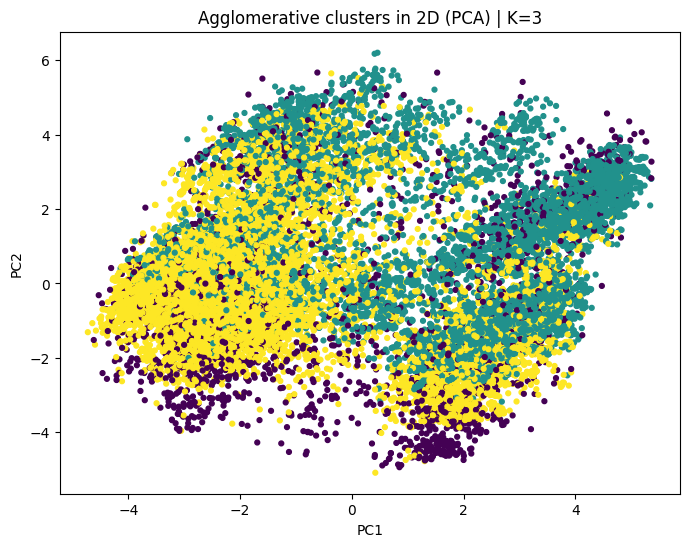

In [38]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=k, linkage="ward")
labels_agg = agg.fit_predict(X)

sil_agg = silhouette_score(X, labels_agg)
print(f"Agglomerative | n_clusters={k} | Silhouette Score = {sil_agg:.4f}")

# plot PCA
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels_agg, s=12)
plt.title(f"Agglomerative clusters in 2D (PCA) | K={k}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


**Observati**: Deși Agglomerative Clustering a fost testat ca metodă alternativă, rezultatele obținute indică o separare slabă între clustere, atât vizual (PCA 2D), cât și numeric (Silhouette Score foarte scăzut). În consecință, această metodă nu oferă avantaje față de K-Means pentru acest dataset.

### Alternative clustering: DBSCAN

DBSCAN clusters: 229
DBSCAN noise points: 19845
DBSCAN | Silhouette Score (without noise) = 0.7314


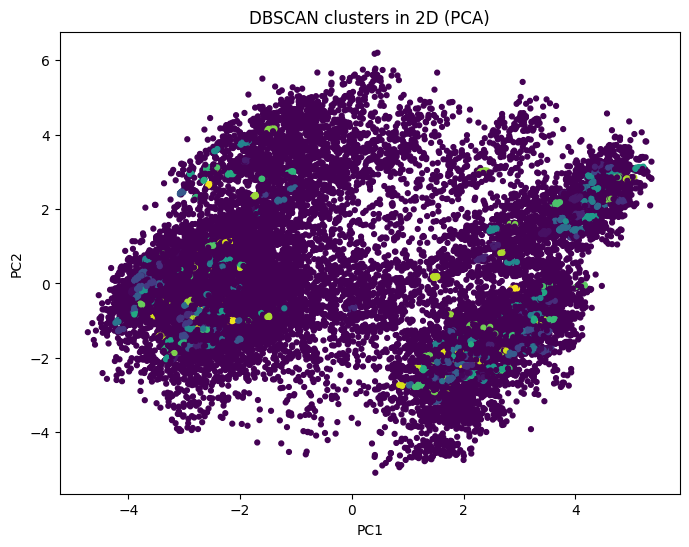

In [39]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.8, min_samples=10)  # <-- ajustează eps dacă dă prea mult noise
labels_db = db.fit_predict(X)

n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise = (labels_db == -1).sum()

print("DBSCAN clusters:", n_clusters)
print("DBSCAN noise points:", n_noise)

# Silhouette doar dacă are >=2 clustere (fără noise)
valid_mask = labels_db != -1
if len(set(labels_db[valid_mask])) >= 2:
    sil_db = silhouette_score(X[valid_mask], labels_db[valid_mask])
    print(f"DBSCAN | Silhouette Score (without noise) = {sil_db:.4f}")
else:
    print("DBSCAN: prea puține clustere pentru Silhouette (după eliminarea noise).")

# plot PCA
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels_db, s=12)
plt.title("DBSCAN clusters in 2D (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


**Observati**: Dintre metodele testate, K-Means a oferit cel mai bun compromis între separarea clusterelor și interpretabilitate. Agglomerative Clustering a prezentat o separare slabă, iar DBSCAN a condus la o supra-segmentare a datelor. În consecință, K-Means a fost ales ca metodă finală pentru analiza clusteringului.

### Concluzie

În această analiză a fost aplicat clustering nesupravegheat pe datasetul preprocesat din Task 1, cu scopul de a identifica structuri și tipare latente în date. Algoritmul K-Means a fost utilizat ca metodă principală, iar numărul optim de clustere a fost determinat prin combinarea metodei Elbow și a scorului Silhouette. Rezultatele au indicat că alegerea a trei clustere oferă un compromis adecvat între separarea grupurilor și interpretabilitate.

Vizualizarea PCA în două dimensiuni a evidențiat o structură clară a clusterelor, chiar dacă există zone de suprapunere, aspect așteptat în cazul datelor socio-economice reale. Analiza distribuției și a caracteristicilor numerice a arătat diferențe semnificative între grupuri, în special în ceea ce privește vârsta și nivelul educațional.

Metodele alternative de clustering, Agglomerative și DBSCAN, au fost testate pentru comparație. Agglomerative Clustering a prezentat o separare slabă între clustere, iar DBSCAN a condus la o supra-segmentare a datelor și la un număr mare de observații clasificate ca noise. În consecință, K-Means a fost ales ca metodă finală, oferind cel mai bun echilibru între calitatea clusterelor și interpretabilitate.